In [1]:
import hydrofunctions as hf
import matplotlib.pyplot as plt
import json
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
# https://hydrofunctions.readthedocs.io/en/master/
# help(hf.NWIS)

In [3]:
# From Docs: "The Daily Mean discharge data are great for situations where you want to know the baseflow of a watershed, or the volume of water that is entering a reservoir or if you want to learn about the long-term hydrology of a watershed."

# Parameters
param = '00060' # discharge
start = "2011-02-15"
end = "2021-04-15"
service = "dv"
state = 'co'

# Pulling data
co = hf.NWIS(None, service, start, end, parameterCd=param, stateCd=state)

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&stateCd=co&parameterCd=00060&startDT=2011-02-15&endDT=2021-04-15


In [4]:
# Changing to dataframe
all_data = co.df('data')

# Dataframe information
n = all_data.shape[0]
print(f'The total length of samples (days) is {n}.')
all_data.head()

The total length of samples (days) is 3713.


,USGS:06613950:00060:00003,USGS:06614800:00060:00003,USGS:06620000:00060:00003,USGS:06659580:00060:00003,USGS:06696980:00060:00003,USGS:06700000:00060:00003,USGS:06701620:00060:00003,USGS:06701700:00060:00003,USGS:06701900:00060:00003,USGS:06708600:00060:00003,...,USGS:392547106023400:00060:00003,USGS:393109104464500:00060:00003,USGS:394220106431500:00060:00003,USGS:394308105413800:00060:00003,USGS:394329104490101:00060:00003,USGS:394839104570300:00060:00003,USGS:401723105400000:00060:00003,USGS:401727105400000:00060:00003,USGS:401733105392404:00060:00003,USGS:402114105350101:00060:00003
datetimeUTC,,,,,,,,,,,,,,,,,,,,,
2011-02-15 00:00:00+00:00,NaN,0.45,130.0,NaN,NaN,NaN,NaN,NaN,110.0,NaN,...,NaN,14.8,109.0,NaN,NaN,34.2,0.03,NaN,0.11,3.49
2011-02-16 00:00:00+00:00,NaN,0.45,135.0,NaN,NaN,NaN,NaN,NaN,135.0,NaN,...,NaN,16.2,110.0,NaN,NaN,22.0,0.03,NaN,0.13,3.72
2011-02-17 00:00:00+00:00,NaN,0.45,140.0,NaN,NaN,NaN,NaN,NaN,167.0,NaN,...,NaN,19.7,111.0,NaN,NaN,17.2,0.03,NaN,0.12,4.29
2011-02-18 00:00:00+00:00,NaN,0.45,135.0,NaN,NaN,NaN,NaN,NaN,151.0,NaN,...,NaN,18.9,108.0,NaN,NaN,13.5,0.03,NaN,0.12,3.79
2011-02-19 00:00:00+00:00,NaN,0.45,135.0,NaN,NaN,NaN,NaN,NaN,134.0,NaN,...,NaN,19.5,109.0,NaN,NaN,12.6,0.03,NaN,0.11,3.91


New Data with Removed Columns...


,USGS:06614800:00060:00003,USGS:06620000:00060:00003,USGS:06701900:00060:00003,USGS:06708800:00060:00003,USGS:06709000:00060:00003,USGS:06709530:00060:00003,USGS:06710150:00060:00003,USGS:06710247:00060:00003,USGS:06710385:00060:00003,USGS:06711565:00060:00003,...,USGS:384220104503701:00060:00003,USGS:385106106571000:00060:00003,USGS:391435106230801:00060:00003,USGS:391517106223801:00060:00003,USGS:393109104464500:00060:00003,USGS:394220106431500:00060:00003,USGS:394839104570300:00060:00003,USGS:401723105400000:00060:00003,USGS:401733105392404:00060:00003,USGS:402114105350101:00060:00003
datetimeUTC,,,,,,,,,,,,,,,,,,,,,
2011-02-15 00:00:00+00:00,0.45,130.0,110.0,18.8,23.4,31.8,3.03,99.0,11.0,118.0,...,0.0,20.2,0.08,0.03,14.8,109.0,34.2,0.03,0.11,3.49
2011-02-16 00:00:00+00:00,0.45,135.0,135.0,17.7,23.5,32.1,2.30,94.7,11.1,112.0,...,0.0,18.6,0.08,0.03,16.2,110.0,22.0,0.03,0.13,3.72
2011-02-17 00:00:00+00:00,0.45,140.0,167.0,17.4,22.9,29.6,1.69,99.8,11.1,111.0,...,0.0,17.6,0.07,0.03,19.7,111.0,17.2,0.03,0.12,4.29
2011-02-18 00:00:00+00:00,0.45,135.0,151.0,15.1,22.3,22.5,1.55,115.0,10.8,119.0,...,0.0,17.9,0.07,0.03,18.9,108.0,13.5,0.03,0.12,3.79
2011-02-19 00:00:00+00:00,0.45,135.0,134.0,14.8,21.1,23.5,1.50,117.0,11.5,119.0,...,0.0,18.5,0.07,0.03,19.5,109.0,12.6,0.03,0.11,3.91


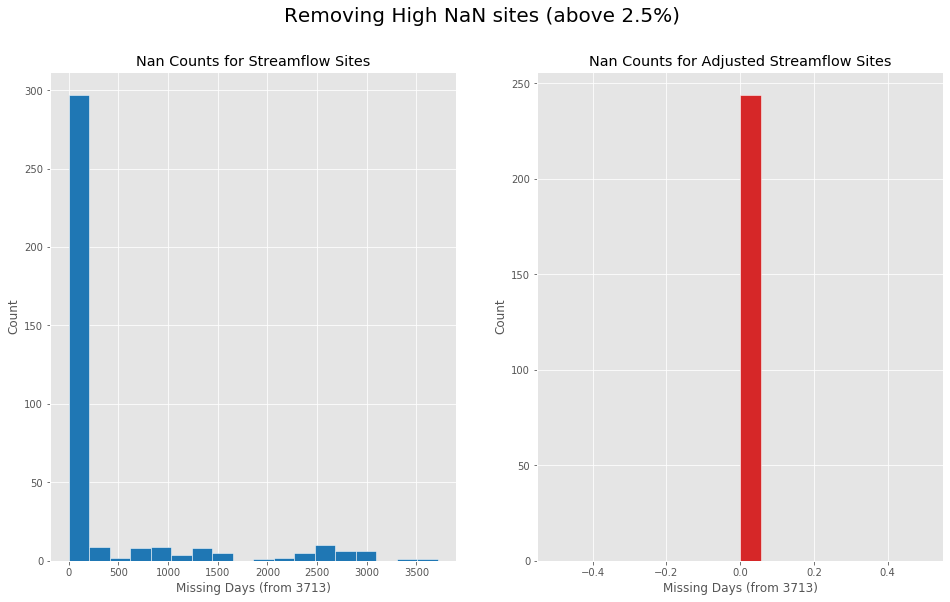

In [6]:
# Decide which sites to keep
tol = 0.025 # we discard any site that has more than X% of the days missing
site_nan_counts = all_data.isnull().sum(axis = 0).values

# Remove columns that do not satisfy length
boolean_column_drop = site_nan_counts <= 0
data = all_data[all_data.columns[boolean_column_drop]]
site_nan_counts_new = data.isnull().sum(axis = 0).values

# Plotting missing days as histogram
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.suptitle(f'Removing High NaN sites (above {tol*100}%)', fontsize=20)

# All sites
ax1.hist(site_nan_counts, bins=18, color='tab:blue', ec='white')
ax1.set_title('Nan Counts for Streamflow Sites')
ax1.set_xlabel(f'Missing Days (from {data.shape[0]})')
ax1.set_ylabel('Count')

# New Sites
ax2.hist(site_nan_counts_new, bins=18, color='tab:red', ec='white')
ax2.set_title('Nan Counts for Adjusted Streamflow Sites')
ax2.set_xlabel(f'Missing Days (from {data.shape[0]})')
ax2.set_ylabel('Count')

print('New Data with Removed Columns...')
data.head()

So here, we notice that we have a decent amount of sites that contain data all the way back 10 years (about 300) but we also have the 
rest lacking lots of information, as much as 3000 days.

# Finding Lat and Long of each site

In [7]:
# We do this first for all sites... (change later)
site_IDs = []
for site in data.columns:
    x = site.split(":")
    site_IDs.append(x[1])
    
print(f'First 5 site ID\'s: {site_IDs[:5]}')

First 5 site ID's: ['06614800', '06620000', '06701900', '06708800', '06709000']


In [8]:
# Dictionary for site ID, lat, and long
site_coor = {}

# Iterate through IDs and store lat and long
for i,ID in enumerate(site_IDs):
    site_coor[i] = {}
    lat = co.meta['USGS:' + ID]['siteLatLongSrs']['latitude']
    lon = co.meta['USGS:' + ID]['siteLatLongSrs']['longitude']

    site_coor[i]['siteID'] = ID
    site_coor[i]['lat'] = lat
    site_coor[i]['lon'] = lon

print(f'Example of first two sites:\n {list(site_coor.values())[:2]}')
with open('site_coordinates.json', 'w') as fp:
    json.dump(site_coor, fp)

Example of first two sites:
 [{'siteID': '06614800', 'lat': 40.49609409, 'lon': -105.8650119}, {'siteID': '06620000', 'lat': 40.93663889, 'lon': -106.3391944}]


# Plotting Lat and Long on Discretized Grid

Text(0, 0.5, 'Latitude')

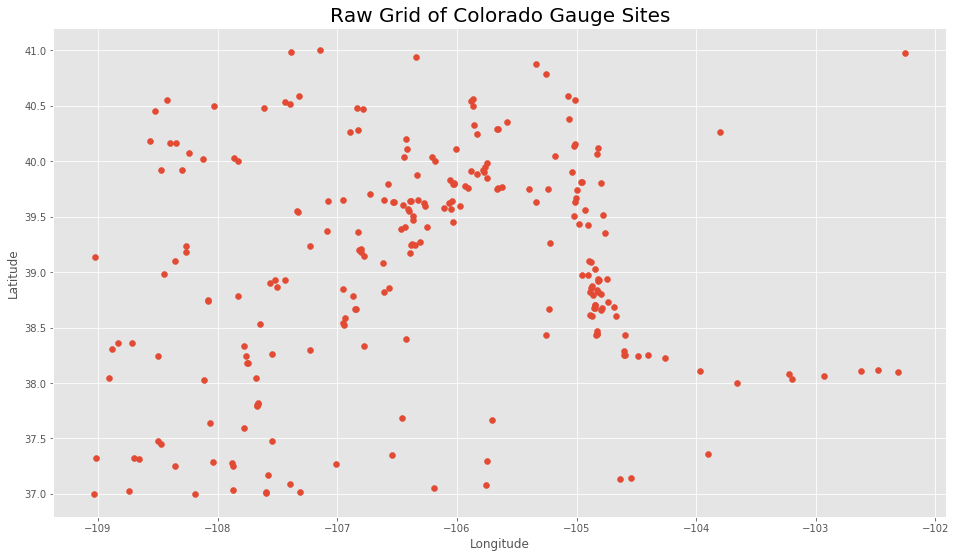

In [9]:
# Saving lat and long as euclidean (projection needed technically)
x = []
y = []

# Iterate through dictionary
for key, site in site_coor.items():
    x.append(site['lon'])
    y.append(site['lat'])

# Raw Plot
plt.scatter(x, y)
plt.title('Raw Grid of Colorado Gauge Sites', fontsize='20')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [10]:
xedges = np.linspace(-110, -102, num=50)
yedges = np.linspace(37, 41, num=50)

H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges)) # x = long, y = lat

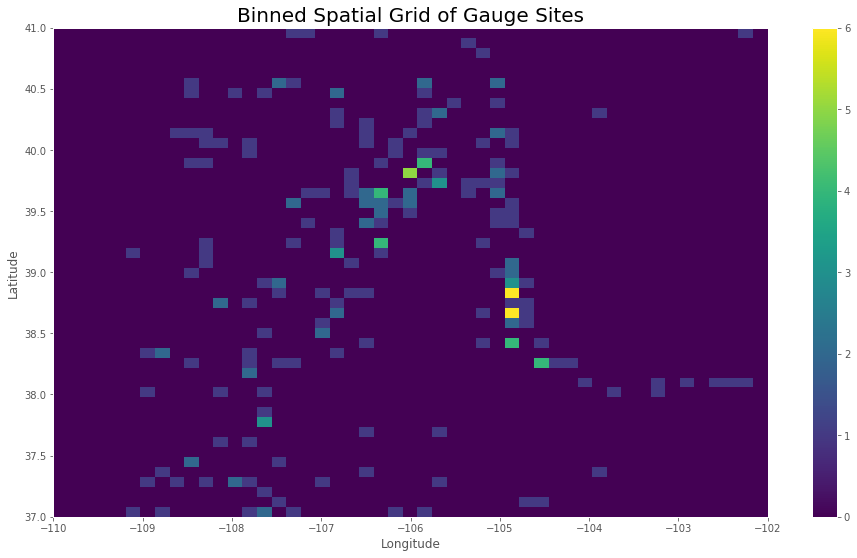

In [11]:
plt.hist2d(x, y, bins = [xedges, yedges])
plt.title('Binned Spatial Grid of Gauge Sites', fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

In [12]:
#read SnoTel location data
file2 = open("SnoLocations.pkl", 'rb')
SnoLocations = pickle.load(file2)
file2.close()

In [13]:
sno_coor = np.array(list(SnoLocations.values()))

In [14]:
sno_coor[0:5,:]

array([[  40.43254, -105.73337],
       [  37.79926, -107.92426],
       [  37.43087, -108.16954],
       [  37.47922, -106.8017 ],
       [  40.34703, -106.09433]])

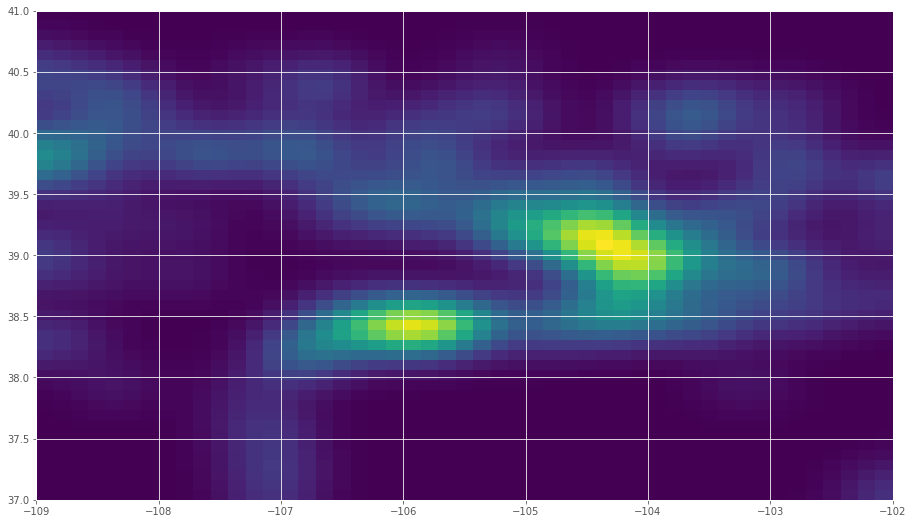

In [15]:
H_sno, xedges, yedges = np.histogram2d(sno_coor[:,1], sno_coor[:,0], bins=(xedges, yedges))
heatmap = gaussian_filter(H, sigma=2)
plt.imshow(heatmap, extent=[-109, -102, 37, 41])
# sns.kdeplot(sno_coor[:,1], sno_coor[:,0], fill=True, cmap="mako", Shade=True)

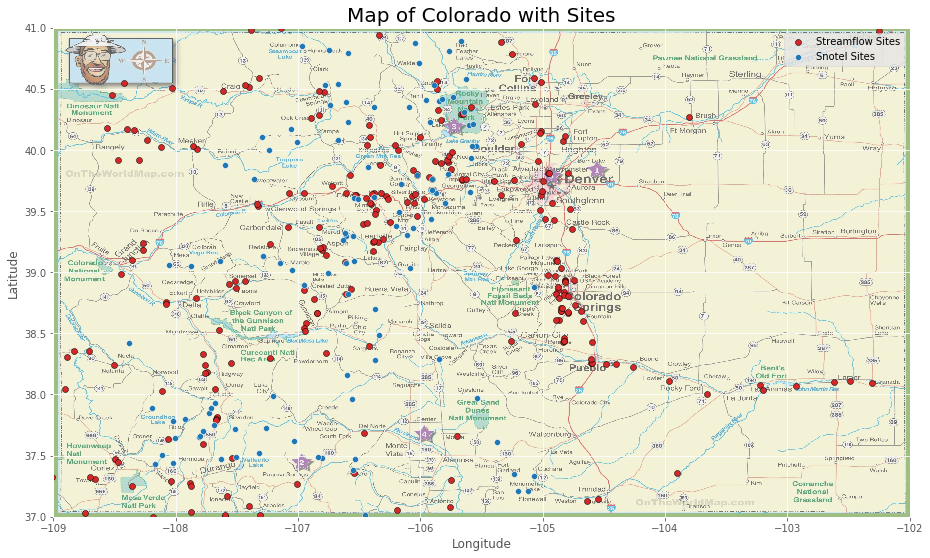

In [16]:
# Colorado Map
co_img = mpimg.imread('map_of_colorado.jpg') # source: http://ontheworldmap.com/usa/state/colorado large-detailed-map-of-colorado-with-cities-and-roads.jpg
bd_points = [-109, -102, 37, 41] # CO boundaries

# Plotting Sites
plt.title('Map of Colorado with Sites', fontsize=20)
plt.scatter(x, y, marker='o', color='tab:red', ec='black', label='Streamflow Sites')
plt.scatter(sno_coor[:,1], sno_coor[:,0], marker='o', color='tab:blue', ec='white', label='Snotel Sites')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.legend()
plt.imshow(co_img, extent=bd_points, alpha=0.6)

In [17]:
site_corr = json.load(open('site_coordinates.json'))

In [18]:
stream_data_dict = {}
for key, site in site_coor.items():
    site_id = site['siteID']
    stream_data = data['USGS:' + site_id + ':00060:00003']
    stream_data_dict[site_id] = stream_data
    # break
# print()
# Example of first site's historical streamflow data
print(stream_data_dict[list(site_corr.items())[0][1]['siteID']])

# Impute it before using full version for graphing!
# with open('streamflow_dict.json', 'w') as fp:
    # json.dump(stream_data_dict, fp)
print(stream_data_dict.items())

                            ...  
2021-04-11 00:00:00+00:00    588.0
2021-04-12 00:00:00+00:00    652.0
2021-04-13 00:00:00+00:00    643.0
2021-04-14 00:00:00+00:00    552.0
2021-04-15 00:00:00+00:00    541.0
Freq: D, Name: USGS:09342500:00060:00003, Length: 3713, dtype: float64), ('09346400', datetimeUTC
2011-02-15 00:00:00+00:00    144.0
2011-02-16 00:00:00+00:00    155.0
2011-02-17 00:00:00+00:00    158.0
2011-02-18 00:00:00+00:00    156.0
2011-02-19 00:00:00+00:00    154.0
                             ...  
2021-04-11 00:00:00+00:00    648.0
2021-04-12 00:00:00+00:00    717.0
2021-04-13 00:00:00+00:00    733.0
2021-04-14 00:00:00+00:00    652.0
2021-04-15 00:00:00+00:00    621.0
Freq: D, Name: USGS:09346400:00060:00003, Length: 3713, dtype: float64), ('09349800', datetimeUTC
2011-02-15 00:00:00+00:00     71.5
2011-02-16 00:00:00+00:00     79.5
2011-02-17 00:00:00+00:00     78.6
2011-02-18 00:00:00+00:00     84.0
2011-02-19 00:00:00+00:00     79.8
                             ...  


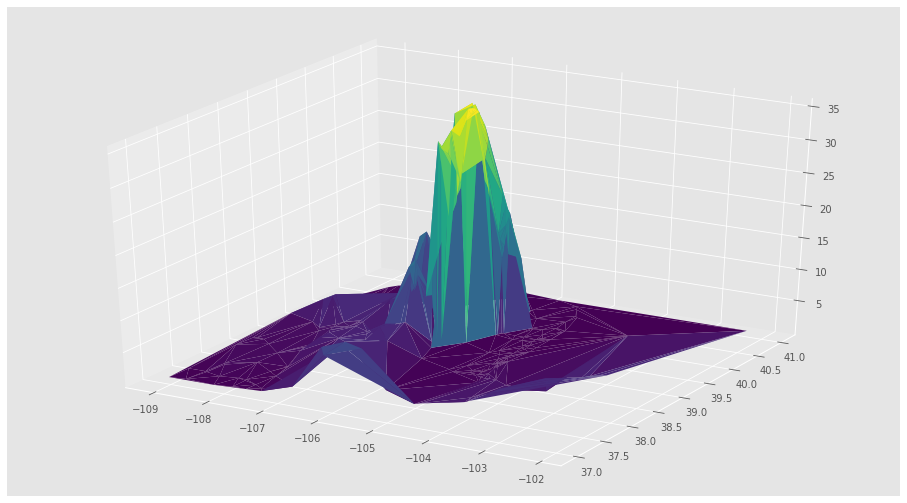

In [47]:
ax = plt.axes(projection='3d')
z = stream_data_dict[list(site_corr.items())[0][1]['siteID']].values
z_heatmap = gaussian_filter(z, sigma=10)
ax.plot_trisurf(x, y, z_heatmap, cmap='viridis', edgecolor='none')

In [23]:
list(stream_data_dict.items())[0][1]

datetimeUTC
2011-02-15 00:00:00+00:00    0.45
2011-02-16 00:00:00+00:00    0.45
2011-02-17 00:00:00+00:00    0.45
2011-02-18 00:00:00+00:00    0.45
2011-02-19 00:00:00+00:00    0.45
                             ... 
2021-04-11 00:00:00+00:00    0.32
2021-04-12 00:00:00+00:00    0.32
2021-04-13 00:00:00+00:00    0.32
2021-04-14 00:00:00+00:00    0.30
2021-04-15 00:00:00+00:00    0.30
Freq: D, Name: USGS:06614800:00060:00003, Length: 3713, dtype: float64

In [ ]:
# winter (December–January–February (DJF)), spring (March–April–May
# (MAM)), summer (June–July–August (JJA)), and fall (September–October–November (SON)).
start_culm = 